In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import os

from sklearn.model_selection import train_test_split

In [2]:
# nltk.download()

In [3]:
sw=stopwords.words('english')

In [4]:
cwd=os.getcwd()
cwd

'C:\\Users\\jashj\\Desktop\\Kaggle'

In [5]:
os.listdir(cwd)

['.ipynb_checkpoints',
 'answers.csv',
 'answers_cv.csv',
 'nlp-getting-started.zip',
 'Original-Copy1.ipynb',
 'Original.ipynb',
 'sample_submission.csv',
 'test - Copy.csv',
 'test.csv',
 'train.csv',
 'Untitled-Copy1.ipynb',
 'Untitled.ipynb',
 'untitled0.py',
 'Untitled1-Copy1.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb']

In [6]:
# os.chdir('Kaggle')

In [7]:
data=pd.read_csv('train.csv')

In [8]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [9]:
data['keyword'] = data['keyword'].fillna('missingkeyword')

In [10]:
data['location'] = data['location'].fillna('missinglocation')

In [11]:
data['combined']=data['keyword']+str(' ')+data['location']+str(' ')+data['text']

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
data['tokenized']=data['combined'].apply(lambda x : re.split('\s',x))

In [14]:
data['nostop']=data['tokenized'].apply(lambda x: [word for word in x if word.lower() not in sw])

In [15]:
data['join']=data['nostop'].apply(lambda y:' '.join(y))

In [16]:
data['nopunct']=data['join'].apply(lambda x : ''.join(y for y in x if y not in string.punctuation))

In [17]:
data['nopunct'][3]

'missingkeyword missinglocation 13000 people receive wildfires evacuation orders California '

In [18]:
data['withoutspaces']=data['nopunct'].apply(lambda x : x.strip())

In [19]:
data['length']=data['withoutspaces'].apply(lambda x : len(x))

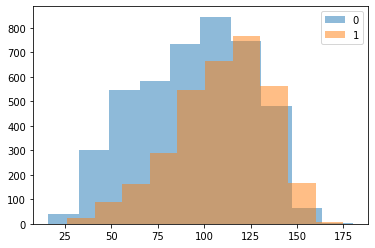

In [20]:
plt.hist(data[data['target']==0]['length'], alpha=0.5, label='0')
plt.hist(data[data['target']==1]['length'], alpha=0.5, label='1')
plt.legend(loc='upper right')
plt.show()

In [21]:
data['join'][0].count(string.punctuation)

0

In [22]:
data['punctcount']=data['join'].apply(lambda x : sum([1 for y in x if y in string.punctuation]))

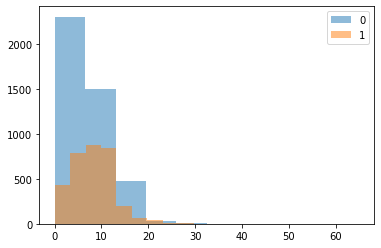

In [23]:
plt.hist(data[data['target']==0]['punctcount'], alpha=0.5, label='0')
plt.hist(data[data['target']==1]['punctcount'], alpha=0.5, label='1')
plt.legend(loc='upper right')
plt.show()

In [24]:
data['punctpercent']=data['punctcount']/data['length']*100

In [25]:
data

,id,keyword,location,text,target,combined,tokenized,nostop,join,nopunct,withoutspaces,length,punctcount,punctpercent
0,1,missingkeyword,missinglocation,Our Deeds are the Reason of this #earthquake M...,1,missingkeyword missinglocation Our Deeds are t...,"[missingkeyword, missinglocation, Our, Deeds, ...","[missingkeyword, missinglocation, Deeds, Reaso...",missingkeyword missinglocation Deeds Reason #e...,missingkeyword missinglocation Deeds Reason ea...,missingkeyword missinglocation Deeds Reason ea...,75,1,1.333333
1,4,missingkeyword,missinglocation,Forest fire near La Ronge Sask. Canada,1,missingkeyword missinglocation Forest fire nea...,"[missingkeyword, missinglocation, Forest, fire...","[missingkeyword, missinglocation, Forest, fire...",missingkeyword missinglocation Forest fire nea...,missingkeyword missinglocation Forest fire nea...,missingkeyword missinglocation Forest fire nea...,68,1,1.470588
2,5,missingkeyword,missinglocation,All residents asked to 'shelter in place' are ...,1,missingkeyword missinglocation All residents a...,"[missingkeyword, missinglocation, All, residen...","[missingkeyword, missinglocation, residents, a...",missingkeyword missinglocation residents asked...,missingkeyword missinglocation residents asked...,missingkeyword missinglocation residents asked...,119,3,2.521008
3,6,missingkeyword,missinglocation,"13,000 people receive #wildfires evacuation or...",1,"missingkeyword missinglocation 13,000 people r...","[missingkeyword, missinglocation, 13,000, peop...","[missingkeyword, missinglocation, 13,000, peop...","missingkeyword missinglocation 13,000 people r...",missingkeyword missinglocation 13000 people re...,missingkeyword missinglocation 13000 people re...,90,2,2.222222
4,7,missingkeyword,missinglocation,Just got sent this photo from Ruby #Alaska as ...,1,missingkeyword missinglocation Just got sent t...,"[missingkeyword, missinglocation, Just, got, s...","[missingkeyword, missinglocation, got, sent, p...",missingkeyword missinglocation got sent photo ...,missingkeyword missinglocation got sent photo ...,missingkeyword missinglocation got sent photo ...,86,2,2.325581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,missingkeyword,missinglocation,Two giant cranes holding a bridge collapse int...,1,missingkeyword missinglocation Two giant crane...,"[missingkeyword, missinglocation, Two, giant, ...","[missingkeyword, missinglocation, Two, giant, ...",missingkeyword missinglocation Two giant crane...,missingkeyword missinglocation Two giant crane...,missingkeyword missinglocation Two giant crane...,102,5,4.901961
7609,10870,missingkeyword,missinglocation,@aria_ahrary @TheTawniest The out of control w...,1,missingkeyword missinglocation @aria_ahrary @T...,"[missingkeyword, missinglocation, @aria_ahrary...","[missingkeyword, missinglocation, @aria_ahrary...",missingkeyword missinglocation @aria_ahrary @T...,missingkeyword missinglocation ariaahrary TheT...,missingkeyword missinglocation ariaahrary TheT...,118,5,4.237288
7610,10871,missingkeyword,missinglocation,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,missingkeyword missinglocation M1.94 [01:04 UT...,"[missingkeyword, missinglocation, M1.94, [01:0...","[missingkeyword, missinglocation, M1.94, [01:0...",missingkeyword missinglocation M1.94 [01:04 UT...,missingkeyword missinglocation M194 0104 UTC5k...,missingkeyword missinglocation M194 0104 UTC5k...,80,11,13.750000
7611,10872,missingkeyword,missinglocation,Police investigating after an e-bike collided ...,1,missingkeyword missinglocation Police investig...,"[missingkeyword, missinglocation, Police, inve...","[missingkeyword, missinglocation, Police, inve...",missingkeyword missinglocation Police investig...,missingkeyword missinglocation Police investig...,missingkeyword missinglocation Police investig...,144,5,3.472222


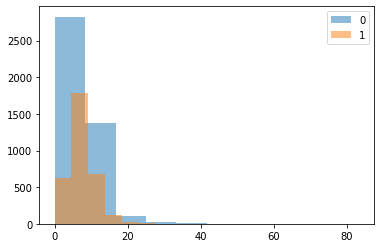

In [26]:
plt.hist(data[data['target']==0]['punctpercent'], alpha=0.5, label='0')
plt.hist(data[data['target']==1]['punctpercent'], alpha=0.5, label='1')
plt.legend(loc='upper right')
plt.show()

In [27]:
X=data.drop(columns='target')
y=data['target']

In [28]:
X

,id,keyword,location,text,combined,tokenized,nostop,join,nopunct,withoutspaces,length,punctcount,punctpercent
0,1,missingkeyword,missinglocation,Our Deeds are the Reason of this #earthquake M...,missingkeyword missinglocation Our Deeds are t...,"[missingkeyword, missinglocation, Our, Deeds, ...","[missingkeyword, missinglocation, Deeds, Reaso...",missingkeyword missinglocation Deeds Reason #e...,missingkeyword missinglocation Deeds Reason ea...,missingkeyword missinglocation Deeds Reason ea...,75,1,1.333333
1,4,missingkeyword,missinglocation,Forest fire near La Ronge Sask. Canada,missingkeyword missinglocation Forest fire nea...,"[missingkeyword, missinglocation, Forest, fire...","[missingkeyword, missinglocation, Forest, fire...",missingkeyword missinglocation Forest fire nea...,missingkeyword missinglocation Forest fire nea...,missingkeyword missinglocation Forest fire nea...,68,1,1.470588
2,5,missingkeyword,missinglocation,All residents asked to 'shelter in place' are ...,missingkeyword missinglocation All residents a...,"[missingkeyword, missinglocation, All, residen...","[missingkeyword, missinglocation, residents, a...",missingkeyword missinglocation residents asked...,missingkeyword missinglocation residents asked...,missingkeyword missinglocation residents asked...,119,3,2.521008
3,6,missingkeyword,missinglocation,"13,000 people receive #wildfires evacuation or...","missingkeyword missinglocation 13,000 people r...","[missingkeyword, missinglocation, 13,000, peop...","[missingkeyword, missinglocation, 13,000, peop...","missingkeyword missinglocation 13,000 people r...",missingkeyword missinglocation 13000 people re...,missingkeyword missinglocation 13000 people re...,90,2,2.222222
4,7,missingkeyword,missinglocation,Just got sent this photo from Ruby #Alaska as ...,missingkeyword missinglocation Just got sent t...,"[missingkeyword, missinglocation, Just, got, s...","[missingkeyword, missinglocation, got, sent, p...",missingkeyword missinglocation got sent photo ...,missingkeyword missinglocation got sent photo ...,missingkeyword missinglocation got sent photo ...,86,2,2.325581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,missingkeyword,missinglocation,Two giant cranes holding a bridge collapse int...,missingkeyword missinglocation Two giant crane...,"[missingkeyword, missinglocation, Two, giant, ...","[missingkeyword, missinglocation, Two, giant, ...",missingkeyword missinglocation Two giant crane...,missingkeyword missinglocation Two giant crane...,missingkeyword missinglocation Two giant crane...,102,5,4.901961
7609,10870,missingkeyword,missinglocation,@aria_ahrary @TheTawniest The out of control w...,missingkeyword missinglocation @aria_ahrary @T...,"[missingkeyword, missinglocation, @aria_ahrary...","[missingkeyword, missinglocation, @aria_ahrary...",missingkeyword missinglocation @aria_ahrary @T...,missingkeyword missinglocation ariaahrary TheT...,missingkeyword missinglocation ariaahrary TheT...,118,5,4.237288
7610,10871,missingkeyword,missinglocation,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,missingkeyword missinglocation M1.94 [01:04 UT...,"[missingkeyword, missinglocation, M1.94, [01:0...","[missingkeyword, missinglocation, M1.94, [01:0...",missingkeyword missinglocation M1.94 [01:04 UT...,missingkeyword missinglocation M194 0104 UTC5k...,missingkeyword missinglocation M194 0104 UTC5k...,80,11,13.750000
7611,10872,missingkeyword,missinglocation,Police investigating after an e-bike collided ...,missingkeyword missinglocation Police investig...,"[missingkeyword, missinglocation, Police, inve...","[missingkeyword, missinglocation, Police, inve...",missingkeyword missinglocation Police investig...,missingkeyword missinglocation Police investig...,missingkeyword missinglocation Police investig...,144,5,3.472222


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
X_train=X

In [33]:
y_train=y

In [34]:
X_train

,id,keyword,location,text,combined,tokenized,nostop,join,nopunct,withoutspaces,length,punctcount,punctpercent
0,1,missingkeyword,missinglocation,Our Deeds are the Reason of this #earthquake M...,missingkeyword missinglocation Our Deeds are t...,"[missingkeyword, missinglocation, Our, Deeds, ...","[missingkeyword, missinglocation, Deeds, Reaso...",missingkeyword missinglocation Deeds Reason #e...,missingkeyword missinglocation Deeds Reason ea...,missingkeyword missinglocation Deeds Reason ea...,75,1,1.333333
1,4,missingkeyword,missinglocation,Forest fire near La Ronge Sask. Canada,missingkeyword missinglocation Forest fire nea...,"[missingkeyword, missinglocation, Forest, fire...","[missingkeyword, missinglocation, Forest, fire...",missingkeyword missinglocation Forest fire nea...,missingkeyword missinglocation Forest fire nea...,missingkeyword missinglocation Forest fire nea...,68,1,1.470588
2,5,missingkeyword,missinglocation,All residents asked to 'shelter in place' are ...,missingkeyword missinglocation All residents a...,"[missingkeyword, missinglocation, All, residen...","[missingkeyword, missinglocation, residents, a...",missingkeyword missinglocation residents asked...,missingkeyword missinglocation residents asked...,missingkeyword missinglocation residents asked...,119,3,2.521008
3,6,missingkeyword,missinglocation,"13,000 people receive #wildfires evacuation or...","missingkeyword missinglocation 13,000 people r...","[missingkeyword, missinglocation, 13,000, peop...","[missingkeyword, missinglocation, 13,000, peop...","missingkeyword missinglocation 13,000 people r...",missingkeyword missinglocation 13000 people re...,missingkeyword missinglocation 13000 people re...,90,2,2.222222
4,7,missingkeyword,missinglocation,Just got sent this photo from Ruby #Alaska as ...,missingkeyword missinglocation Just got sent t...,"[missingkeyword, missinglocation, Just, got, s...","[missingkeyword, missinglocation, got, sent, p...",missingkeyword missinglocation got sent photo ...,missingkeyword missinglocation got sent photo ...,missingkeyword missinglocation got sent photo ...,86,2,2.325581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,missingkeyword,missinglocation,Two giant cranes holding a bridge collapse int...,missingkeyword missinglocation Two giant crane...,"[missingkeyword, missinglocation, Two, giant, ...","[missingkeyword, missinglocation, Two, giant, ...",missingkeyword missinglocation Two giant crane...,missingkeyword missinglocation Two giant crane...,missingkeyword missinglocation Two giant crane...,102,5,4.901961
7609,10870,missingkeyword,missinglocation,@aria_ahrary @TheTawniest The out of control w...,missingkeyword missinglocation @aria_ahrary @T...,"[missingkeyword, missinglocation, @aria_ahrary...","[missingkeyword, missinglocation, @aria_ahrary...",missingkeyword missinglocation @aria_ahrary @T...,missingkeyword missinglocation ariaahrary TheT...,missingkeyword missinglocation ariaahrary TheT...,118,5,4.237288
7610,10871,missingkeyword,missinglocation,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,missingkeyword missinglocation M1.94 [01:04 UT...,"[missingkeyword, missinglocation, M1.94, [01:0...","[missingkeyword, missinglocation, M1.94, [01:0...",missingkeyword missinglocation M1.94 [01:04 UT...,missingkeyword missinglocation M194 0104 UTC5k...,missingkeyword missinglocation M194 0104 UTC5k...,80,11,13.750000
7611,10872,missingkeyword,missinglocation,Police investigating after an e-bike collided ...,missingkeyword missinglocation Police investig...,"[missingkeyword, missinglocation, Police, inve...","[missingkeyword, missinglocation, Police, inve...",missingkeyword missinglocation Police investig...,missingkeyword missinglocation Police investig...,missingkeyword missinglocation Police investig...,144,5,3.472222


In [35]:
######Test preprocessing#####

In [36]:
data_test=pd.read_csv('test.csv')

In [37]:
data_test['keyword'] = data_test['keyword'].fillna('missingkeyword')

In [38]:
data_test['location'] = data_test['location'].fillna('missinglocation')

In [39]:
data_test['combined']=data_test['keyword']+str(' ')+data_test['location']+str(' ')+data_test['text']

In [40]:
data_test['tokenized']=data_test['combined'].apply(lambda x : re.split('\s',x))

In [41]:
data_test['nostop']=data_test['tokenized'].apply(lambda x: [word for word in x if word.lower() not in sw])

In [42]:
data_test['join']=data_test['nostop'].apply(lambda y:' '.join(y))

In [43]:
data_test['nopunct']=data_test['join'].apply(lambda x : ''.join(y for y in x if y not in string.punctuation))

In [44]:
data_test['nopunct'][3]

'missingkeyword missinglocation Apocalypse lighting Spokane wildfires'

In [45]:
data_test['withoutspaces']=data_test['nopunct'].apply(lambda x : x.strip())

In [46]:
data_test['length']=data_test['withoutspaces'].apply(lambda x : len(x))

In [47]:
data_test['join'][0].count(string.punctuation)

0

In [48]:
data_test['punctcount']=data_test['join'].apply(lambda x : sum([1 for y in x if y in string.punctuation]))

In [49]:
data_test['punctpercent']=data_test['punctcount']/data_test['length']*100

In [50]:
X_test=data_test

In [51]:
X_test

,id,keyword,location,text,combined,tokenized,nostop,join,nopunct,withoutspaces,length,punctcount,punctpercent
0,0,missingkeyword,missinglocation,Just happened a terrible car crash,missingkeyword missinglocation Just happened a...,"[missingkeyword, missinglocation, Just, happen...","[missingkeyword, missinglocation, happened, te...",missingkeyword missinglocation happened terrib...,missingkeyword missinglocation happened terrib...,missingkeyword missinglocation happened terrib...,58,0,0.000000
1,2,missingkeyword,missinglocation,"Heard about #earthquake is different cities, s...",missingkeyword missinglocation Heard about #ea...,"[missingkeyword, missinglocation, Heard, about...","[missingkeyword, missinglocation, Heard, #eart...",missingkeyword missinglocation Heard #earthqua...,missingkeyword missinglocation Heard earthquak...,missingkeyword missinglocation Heard earthquak...,83,3,3.614458
2,3,missingkeyword,missinglocation,"there is a forest fire at spot pond, geese are...",missingkeyword missinglocation there is a fore...,"[missingkeyword, missinglocation, there, is, a...","[missingkeyword, missinglocation, forest, fire...",missingkeyword missinglocation forest fire spo...,missingkeyword missinglocation forest fire spo...,missingkeyword missinglocation forest fire spo...,92,2,2.173913
3,9,missingkeyword,missinglocation,Apocalypse lighting. #Spokane #wildfires,missingkeyword missinglocation Apocalypse ligh...,"[missingkeyword, missinglocation, Apocalypse, ...","[missingkeyword, missinglocation, Apocalypse, ...",missingkeyword missinglocation Apocalypse ligh...,missingkeyword missinglocation Apocalypse ligh...,missingkeyword missinglocation Apocalypse ligh...,68,3,4.411765
4,11,missingkeyword,missinglocation,Typhoon Soudelor kills 28 in China and Taiwan,missingkeyword missinglocation Typhoon Soudelo...,"[missingkeyword, missinglocation, Typhoon, Sou...","[missingkeyword, missinglocation, Typhoon, Sou...",missingkeyword missinglocation Typhoon Soudelo...,missingkeyword missinglocation Typhoon Soudelo...,missingkeyword missinglocation Typhoon Soudelo...,69,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,missingkeyword,missinglocation,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,missingkeyword missinglocation EARTHQUAKE SAFE...,"[missingkeyword, missinglocation, EARTHQUAKE, ...","[missingkeyword, missinglocation, EARTHQUAKE, ...",missingkeyword missinglocation EARTHQUAKE SAFE...,missingkeyword missinglocation EARTHQUAKE SAFE...,missingkeyword missinglocation EARTHQUAKE SAFE...,86,0,0.000000
3259,10865,missingkeyword,missinglocation,Storm in RI worse than last hurricane. My city...,missingkeyword missinglocation Storm in RI wor...,"[missingkeyword, missinglocation, Storm, in, R...","[missingkeyword, missinglocation, Storm, RI, w...",missingkeyword missinglocation Storm RI worse ...,missingkeyword missinglocation Storm RI worse ...,missingkeyword missinglocation Storm RI worse ...,144,5,3.472222
3260,10868,missingkeyword,missinglocation,Green Line derailment in Chicago http://t.co/U...,missingkeyword missinglocation Green Line dera...,"[missingkeyword, missinglocation, Green, Line,...","[missingkeyword, missinglocation, Green, Line,...",missingkeyword missinglocation Green Line dera...,missingkeyword missinglocation Green Line dera...,missingkeyword missinglocation Green Line dera...,78,5,6.410256
3261,10874,missingkeyword,missinglocation,MEG issues Hazardous Weather Outlook (HWO) htt...,missingkeyword missinglocation MEG issues Haza...,"[missingkeyword, missinglocation, MEG, issues,...","[missingkeyword, missinglocation, MEG, issues,...",missingkeyword missinglocation MEG issues Haza...,missingkeyword missinglocation MEG issues Haza...,missingkeyword missinglocation MEG issues Haza...,89,7,7.865169


In [52]:
tfidf_vect = TfidfVectorizer()

In [53]:
X_train_vect = tfidf_vect.fit_transform(X_train['withoutspaces'])

In [54]:
tfidf_vect.get_feature_names()[-5:]

['ûóher', 'ûókody', 'ûónegligence', 'ûótech', 'ûówe']

In [55]:
X_train_vect

<7613x24333 sparse matrix of type '<class 'numpy.float64'>'
	with 88133 stored elements in Compressed Sparse Row format>

In [56]:
X_train_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X_train_vect.toarray().shape

(7613, 24333)

In [58]:
tfidf_vect.get_feature_names()[-5:]

['ûóher', 'ûókody', 'ûónegligence', 'ûótech', 'ûówe']

In [59]:
a=X_train[['length','punctcount','punctpercent']]

In [60]:
a.reset_index(drop=True,inplace=True)

In [61]:
# X_train_concatenate=pd.concat([a, pd.DataFrame(X_train_vect.toarray())], axis=1)
X_train_concatenate=a

In [62]:
X_train_concatenate

,length,punctcount,punctpercent
0,75,1,1.333333
1,68,1,1.470588
2,119,3,2.521008
3,90,2,2.222222
4,86,2,2.325581
...,...,...,...
7608,102,5,4.901961
7609,118,5,4.237288
7610,80,11,13.750000
7611,144,5,3.472222


In [63]:
############Test Combining

In [64]:
X_test_vect = tfidf_vect.transform(X_test['withoutspaces'])

In [65]:
X_test_vect

<3263x24333 sparse matrix of type '<class 'numpy.float64'>'
	with 30695 stored elements in Compressed Sparse Row format>

In [66]:
b=X_test[['length','punctcount','punctpercent']]

In [67]:
b.reset_index(drop=True,inplace=True)

In [68]:
# X_test_concatenate=pd.concat([b, pd.DataFrame(X_test_vect.toarray())], axis=1)
X_test_concatenate=b

In [69]:
X_test_concatenate

,length,punctcount,punctpercent
0,58,0,0.000000
1,83,3,3.614458
2,92,2,2.173913
3,68,3,4.411765
4,69,0,0.000000
...,...,...,...
3258,86,0,0.000000
3259,144,5,3.472222
3260,78,5,6.410256
3261,89,7,7.865169


In [70]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
############ Baseline Logistic Regression with original features ######################
l=[0.1,0.5,2,5,10]
logreg=LogisticRegression(solver='lbfgs',max_iter=1000,n_jobs=-1,penalty='l2')
logreg.fit(X_train_concatenate,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred=logreg.predict(X_test_concatenate)
# score=accuracy_score(y_test, y_pred, normalize=True)
# score


In [73]:
# cf_lr_orig=confusion_matrix(y_test, y_pred)
# fig, ax = plot_confusion_matrix(conf_mat=cf_lr_orig)

In [74]:
data_test['id'],y_pred

(0           0
 1           2
 2           3
 3           9
 4          11
         ...  
 3258    10861
 3259    10865
 3260    10868
 3261    10874
 3262    10875
 Name: id, Length: 3263, dtype: int64,
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [75]:
id=pd.DataFrame(data_test['id'])
solution=pd.DataFrame(y_pred,columns=['target'])

In [76]:
sample=pd.concat([id,solution],axis=1)

In [77]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,1
3260,10868,0
3261,10874,0


In [78]:
sample.to_csv('answers.csv',index=False)

In [79]:
############ Logistic Regression CV with original features ######################
l=[0.1,0.5,1,2,5,10]
logregcv=LogisticRegressionCV(Cs=l,cv=5,solver='lbfgs',max_iter=1000,n_jobs=-1,penalty='l2')
logregcv.fit(X_train_concatenate,y_train)


LogisticRegressionCV(Cs=[0.1, 0.5, 1, 2, 5, 10], class_weight=None, cv=5,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=1000, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [80]:
y_pred_cv=logregcv.predict(X_test_concatenate)


In [81]:
# cf_lr_orig_cv=confusion_matrix(y_test, y_pred_cv)
# fig, ax = plot_confusion_matrix(conf_mat=cf_lr_orig_cv)

In [82]:
print(y_pred_cv)

[0 0 0 ... 0 0 0]


In [83]:
id_cv=pd.DataFrame(data_test['id'])
solution_cv=pd.DataFrame(y_pred_cv,columns=['target'])

In [84]:
sample_cv=pd.concat([id_cv,solution_cv],axis=1)

In [85]:
sample_cv

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,1
3260,10868,0
3261,10874,0


In [86]:
sample_cv.to_csv('answers_cv.csv',index=False)